<a href="https://colab.research.google.com/github/aminehd/AminehTechnicalWritings/blob/main/LinearRegressionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outline
- Introduction (Purpose + scope)
- Body
  - Load data in repo
  - Linear regression is solving linear equations approximately.
  - Matrix notation of linear regression.
  - Different algebraic ways one can view the problem.
  - The line fitting.
  - Connection between method of least squares and the distribution of error terms.
- Conclusion:

##Git Setup

In [ ]:
import google.colab
repo_path = 'AminehTechnicalWritings'
!git -C $repo_path pull origin || git clone https://github.com/aminehd/AminehTechnicalWritings/ $repo_path
local_clone = '/content/' + repo_path
!git config --global user.email "amineh.dadsetan@gmail.com"
!git config --global user.name "Amineh Dadsetan"

fatal: cannot change to 'AminehTechnicalWritings': No such file or directory
Cloning into 'AminehTechnicalWritings'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 125 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (125/125), 3.11 MiB | 17.30 MiB/s, done.
Resolving deltas: 100% (65/65), done.


## Introduction
I have created a [jupyter notebook](https://colab.research.google.com/github/aminehd/AminehTechnicalWritings/blob/main/DistributionsOfAspectsOfData.ipynb) to generate some random data.

Note: At the end of each notebook, I save artifact to the repo so we can load them in any subsequent notebook. 👾 📦

The random data from  previous notebook follows the assumption of linear regression. This assumes that if you subtract a linear combination of predictors from the response, the result will have a standard normal distribution. Hence, you can fit a linear model to a given sample.



It's important to pause a bit and notice the differenc of a given sample of size n and the whole population. Let's look at a given sample. ⏸






In [ ]:
import numpy as np
files = np.load(local_clone + '/population.npz')
# sample = np.load(local_clone + '/sample.npy'
population = files['arr_0']
population.shape

(300000, 2)

In [ ]:
n = 30
sample_index = np.random.choice(population.shape[0], n)
sample = population[sample_index];
sample.shape

(30, 2)

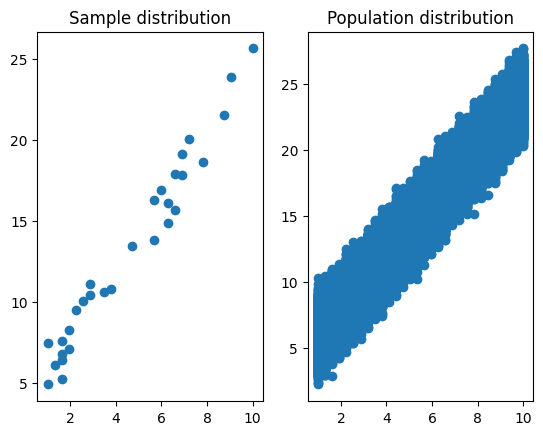

In [ ]:
import matplotlib.pyplot as plt
fix, axes = plt.subplots(ncols=2)
# sample[:,0], sample[:,1]
axes[0].scatter(sample[:,0], sample[:,1])
axes[0].set_title('Sample distribution')
axes[1].set_title('Population distribution')
axes[1].scatter(population[:,0], population[:,1])

However, we have not used matrix notation yet. We have considered given sample as a set of size n.
In contrast, using matrix notation would mean viewing a sample for a given feature,  as a single data point with n-dimensions and not a set anymore. You'll get p, n-dimensional vectors. You could also view a sample as n p-dimensinal vectors. But wait on that a bit.

Fitting a linear model to data is similar to solving n equations with p variables, with one small difference. We can add an error term to the right side of the equation, so the system always has a solution. However, the trade-off is that there will always be an error, sometimes less sometimes more.
Adding error term was part of [method of least squars](https://en.wikipedia.org/wiki/Least_squares#:~:text=The%20first%20clear%20and%20concise,the%20shape%20of%20the%20Earth.) invented by  Legendre, french matematician.

The equations for a given sample of size n looks likes:
$$
\begin{align}
y_1 &= \beta_1 x_{11} + \cdots + \beta_p x_{1p} + \beta_0 + \epsilon_1\\
y_2 &= \beta_1 x_{21} + \cdots + \beta_p x_{2p} + \beta_0 + \epsilon_2\\
&\vdots \\
y_n &= \beta_1 x_{n1} + \cdots + \beta_p x_{np}  + \beta_0 + \epsilon_n
\end{align}
$$

Using matrix notation: 🦣
$$
y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & x_{12} & \ldots & x_{1p} \\
x_{21} & x_{22} & \ldots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \ldots & x_{np}
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\vdots \\
\beta_p
\end{bmatrix}
+
\begin{bmatrix}
\beta_0 \\
\beta_0 \\
\vdots \\
\beta_0
\end{bmatrix}
+ ϵ$$

A tiny trick helps putting $\beta_0$ with rest of $\beta_i$'s. At least help visually. 🎉 🧙
$$
y =
\begin{bmatrix}
1 & x_{11} & x_{12} & \ldots & x_{1p} \\
1 & x_{21} & x_{22} & \ldots & x_{2p} \\
\vdots &\vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \ldots & x_{np}
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\vdots \\
\beta_p \\
\end{bmatrix}
+ ϵ
$$

There is two linear algebraic interpretations of this:


First interpretation is to have $p$ n-dimensional vectors where $\mathbf{x}_0 = [1, 1, ..., 1]^T$ and for $j >0 $, $\mathbf{x}_j = [x_{1i}, \ldots, x_{nj}]^T$. Then one can expand the above formula to: 🤯

$$
y =
\begin{bmatrix}
1 & x_{11} & x_{12} & \ldots & x_{1p} \\
1 & x_{21} & x_{22} & \ldots & x_{2p} \\
\vdots &\vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \ldots & x_{np}
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\vdots \\
\beta_p \\
\end{bmatrix}
+ ϵ
= \\
\beta_0 *
\begin{bmatrix}
1\\
1 \\
\vdots\\
1
\end{bmatrix}
+ \cdots + \beta_j *
\begin{bmatrix}
x_{1j} \\
x{2j} \\
\vdots \\
x_{nj}
\end{bmatrix} + \cdots + \beta_p *
\begin{bmatrix}
x_{1p} \\
x_{2p} \\
\vdots \\
x_{np}
\end{bmatrix} + \epsilon =\\
\sum_{i \in [0, ...,p]} \beta_i * \mathbf{x}_i
$$

The right hand of fomula is a linear combinations of all $\mathbf{x}_i`s$ and the all one vector. The geometric interpretation of it is that we would like y to be in the hyperplane created by span of these $p + 1$ vectors. And subsequently write y as a linear combination of them.

Now picture gets more clear. For example if  the $p +1 $ vectors  linearly independent, we can think of  them as a basis and thus writing y in terms of them is change of basis for y.

Also, one one can see, the more feature there is compared to the sample size(n), the liklier it gets to have an answer because the vectors are gonna span more of the space.






The second algebraic view can be that there is n vectors, each p + 1 dimensions. For $ 1< i < n$ , $x_i = [y_i, x_{i,1}, ..., x_{ip}]^T$.


But you are not looking for linear combinations of x_i's to equal to equal to y. In fact you are looking for a plane with p dimensions that all x_i exists on it. consequently you are looking for p scalars that identify such plain.
So we are hoping they all fall on a p dimensional plane becuase we think there are p basis that can span all n points. However the p dimensional plain doesnt have to pass vector 0, so we need p + 1 such scalars to determine where  the plain meets y axes for when all x's are 0.
these  p + 1 numbers are going to determine such plain.

while it is nice to visualize the data point using second view, we mainly use the first view to solve the system of equations. Let's find such hyperplane for our sample data points ( or n vectors of 2-dimensional )


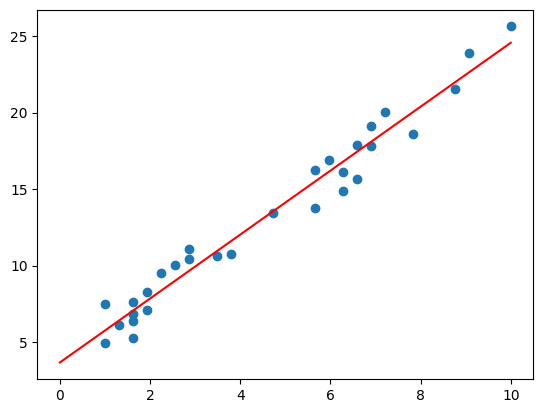

In [ ]:
# fit regression for sample of shape (30, 2)
slope, intercept = np.polyfit(sample[:, 0], sample[:,1], 1)
fig, ax = plt.subplots()
ax.scatter(sample[:, 0], sample[:, 1])
ax.plot(np.linspace(0, 10, 40), slope * np.linspace(0, 10, 40) + intercept, 'r')

## Connection between method of least squares and the Error terms

Without the epsilon term, finding the regression parameters (or $\beta_i$'s) looks like solving multiple linear equations and there is standard prodecures for it. But now what do we do with epsilon term.

Let's take a look into the history of it.

The method of least squares grew out of the fields of astronomy, as scientists tried to provide solutions to the challenges of navigating the Earth's oceans.

Their astronomical observations were in form of lots of equations with lots of variables. But observations always have error in them. So there was cases that these equation do not have any solution. However, they really wanted a solution.

Their trick was to add an error term, and expect that equations to always have some solution. Typically, multiple solutions exist, each with different error term values. The best solution is the one that minimizes the overall error.

How to define the criterion for overal error term? Which function of error do we want to minimize? One possible such funtion is the sum of squares of errors. The modthod that finds the linear regression coefficients by minimizing the sum of square of errors is called method of least squares. Nowdays, method of least squares is part of Regression, particularly it is one possible loss function.


The first clear and concise exposition of the method of least squares was published by [Legendre](https://en.wikipedia.org/wiki/Adrien-Marie_Legendre) in 1805.

However, In 1809 Carl Friedrich Gauss published his method of calculating the orbits of celestial bodies.This naturally led to a priority dispute with Legendre. However, to Gauss's credit, he went beyond Legendre and succeeded in connecting the method of least squares with the principles of probability and to the normal distribution. We'll see how the method gets linked to the probability distribution of errors.

But why method of least square is a good choice for finding the coefficients? the answer to this question depends on two things: firstly on the assumptions about error distribution, and secondly, on what are we looking for in a solution.  

By picking a criterion for solving the equations, in practice, we find a estimate $\hat{\beta_j}$ for $\beta_j$ in below equations. This estimate is a function of $X$ and $y$.

$$
\begin{align}
y_1 &= \beta_1 x_{11} + \cdots + \beta_p x_{1p} + \beta_0 + \epsilon_1\\
y_2 &= \beta_1 x_{21} + \cdots + \beta_p x_{2p} + \beta_0 + \epsilon_2\\
&\vdots \\
y_n &= \beta_1 x_{n1} + \cdots + \beta_p x_{np}  + \beta_0 + \epsilon_n
\end{align}
$$



If we decide to minimize the sum of least square of errors, the estimator $\hat{\beta}$ will be called **ordinary least squares estimator (OLS)** and is below function
$$
\beta_j =  (X^TX)^{-1}X^Ty
$$

⏰  Now, wait for it ..., it turns out that OLS is the **best unbiased linear estimator** or [BLUE](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem) under a few assumptions about the set of error random variables, $\epsilon_i$:
- They have mean zero: $E[\epsilon_i]= 0$
- They are homoscedastic, that is all have the same finite variance: $Var(\epsilon_i) = \sigma^2$ for all i and
- Distinct error terms uncorrelated: $Cov(\epsilon_i, \epsilon_j) = 0, \forall i \neq j.$

⭐ We can answer the question we asked a while ago: why method of least square is a good choice for finding the coefficients, specificaly when the error terms has a normal distribution?  Because under the assumption of normal distibution and uncorrelated error terms, the OLS estimator (that is result of using method of least squares) is going to be Best unbiased linear estimator or BLUE.

🔹 The term BLUE suggests that there are other good estimators. OLS is the best one among the linear and unbiased ones. The fact that OLS estimator is linear in term of y's is easy to verify.

However, we haven't explained what unbiased means.

Here is an observation that helps answer above question:

WHen there is no predictors and error follows normal distribution, mean of responses is what optimizes the sum of squared errors.
In that case $y = [y_1, ..., y_n]^T$ and we would like to find best $\beta_0$ to fit $y = \hat{\beta_0 }$. Then OLS would minimize $\sum{(y_i - \hat{\beta_0})^2}$.

If we use the $\hat{\beta_0}$ calculated for the sample to estimate the $\beta_0$ for the whole population or better to say the real y for population, this estimation is *unbiased*. It means on average we expect $\hat{\beta_0}$ to equal to ${\beta_0}$. Hence an unbiased estimator does not systemically over- or under-estimate the true value.

So basically when predictors are 0 dimensional,  benefit of using method of least square as loss function, estimators would be unbiased over all samples.


  In fact under the assumption of normally distributed errors, the least squares estimates have desirable properties such as being unbiased and having minimum variance among all linear estimators. That is one of the reasons that  method of least squares and normal distribution are tied together.
  
  



## Conclusion
We looked at linear regression problem in the form of solving multiple linear equations. Then we looked at two ways of interpreting a solution with matrixes (or linear spaces). Finally we contemplated on the error terms, method of least squares, and how the mothod is connected to the distribution of error terms.


  
  
This concludes this not book. Next notebook we try to look at the model coefficients ($\beta_i$'s ) as summary statistics defined on samples. You can also think of them as measures since samples are subsets.  

Then we look at  expected value of sample statistices over multiple sampling. Also we look at variance of stuff within sample, and variance of sample   stat over several samplings. This indeed is an intersting case when sample stat is defined to be the mean of sample.


These can help understand concept of Standard Error and F-test better.

